In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/pdf/dataset/train'
valid_path = 'C:/pdf/dataset/validation'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('C:/pdf/dataset/train/*')

In [6]:
folders

['C:/pdf/dataset/train\\glaucoma', 'C:/pdf/dataset/train\\nonglaucoma']

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
from tensorflow.keras.layers import MaxPooling2D

In [11]:
### Create Model from scratch using CNN
"""model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()"""

'model=Sequential()\nmodel.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))\nmodel.add(MaxPooling2D(pool_size=2))\nmodel.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))\nmodel.add(MaxPooling2D(pool_size=2))\nmodel.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))\nmodel.add(MaxPooling2D(pool_size=2))\nmodel.add(Flatten())\nmodel.add(Dense(500,activation="relu"))\nmodel.add(Dense(2,activation="softmax"))\nmodel.summary()'

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/pdf/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 455 images belonging to 2 classes.


In [15]:
training_set

In [16]:
test_set = test_datagen.flow_from_directory('C:/pdf/dataset/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 455 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\harshith s r\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
15/15 [==============================] - 205s 14s/step - loss: 1.2148 - accuracy: 0.5283 - val_loss: 0.9612 - val_accuracy: 0.5099
Epoch 2/15
15/15 [==============================] - 213s 15s/step - loss: 0.8907 - accuracy: 0.5679 - val_loss: 1.0197 - val_accuracy: 0.5385
Epoch 3/15
15/15 [==============================] - 200s 14s/step - loss: 0.7481 - accuracy: 0.5988 - val_loss: 0.4823 - val_accuracy: 0.7560
Epoch 4/15
15/15 [==============================] - 198s 14s/step - loss: 0.5037 - accuracy: 0.7578 - val_loss: 0.5332 - val_accuracy: 0.7319
Epoch 5/15
15/15 [==============================] - 203s 14s/step - loss: 0.4790 - accuracy: 0.7689 - val_loss: 0.5493 - val_accuracy: 0.7297
Epoch 6/15
15/15 [==============================] - 198s 14s/step - loss: 0.4845 - accuracy: 0.7375 - val_loss: 0.4445 - val_accuracy: 0.7736
Epoch 7/15
15/15 [==============================] - 198s 14s/step - loss: 0.4654 - accuracy: 0.7699 - val_loss: 0.4221 - val_accuracy: 0.7868
Epoch 

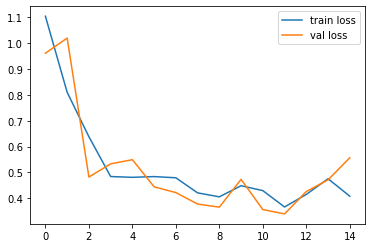

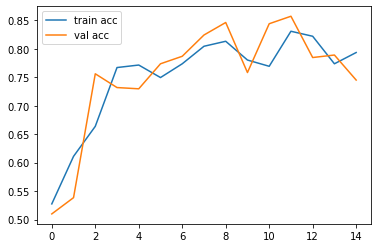

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [20]:

y_pred = model.predict(test_set)


In [21]:
y_pred

array([[9.95363235e-01, 4.63675056e-03],
       [8.60103130e-01, 1.39896929e-01],
       [9.66547966e-01, 3.34520340e-02],
       [9.12108421e-01, 8.78916532e-02],
       [9.73290622e-01, 2.67093685e-02],
       [8.60632837e-01, 1.39367193e-01],
       [9.57816958e-01, 4.21830378e-02],
       [6.04042292e-01, 3.95957679e-01],
       [9.23871458e-01, 7.61284828e-02],
       [9.99045193e-01, 9.54808143e-04],
       [9.96745229e-01, 3.25474748e-03],
       [9.13267314e-01, 8.67326334e-02],
       [9.87553477e-01, 1.24465646e-02],
       [9.76468801e-01, 2.35311911e-02],
       [9.97104466e-01, 2.89549027e-03],
       [9.95475829e-01, 4.52418206e-03],
       [5.90639591e-01, 4.09360379e-01],
       [5.69934189e-01, 4.30065840e-01],
       [4.51764613e-01, 5.48235357e-01],
       [2.89500564e-01, 7.10499406e-01],
       [1.21771343e-01, 8.78228605e-01],
       [7.87616074e-01, 2.12383941e-01],
       [1.72519848e-01, 8.27480137e-01],
       [9.97776926e-01, 2.22310331e-03],
       [9.672252

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_vgg19.h5')

In [26]:
img=image.load_img('C:/pdf/dataset/test/glaucoma/Im182.jpg',target_size=(224,224))



In [27]:
x=image.img_to_array(img)
x

array([[[181.,  72.,  41.],
        [182.,  73.,  42.],
        [182.,  73.,  42.],
        ...,
        [159.,  69.,  43.],
        [158.,  71.,  44.],
        [154.,  67.,  40.]],

       [[177.,  68.,  37.],
        [180.,  71.,  40.],
        [182.,  73.,  42.],
        ...,
        [160.,  70.,  44.],
        [157.,  70.,  43.],
        [157.,  70.,  43.]],

       [[179.,  70.,  39.],
        [177.,  68.,  37.],
        [178.,  69.,  38.],
        ...,
        [159.,  69.,  42.],
        [157.,  70.,  42.],
        [157.,  70.,  42.]],

       ...,

       [[179.,  71.,  42.],
        [177.,  69.,  40.],
        [178.,  70.,  41.],
        ...,
        [153.,  58.,  40.],
        [151.,  58.,  40.],
        [150.,  59.,  40.]],

       [[175.,  70.,  40.],
        [175.,  70.,  40.],
        [178.,  73.,  43.],
        ...,
        [155.,  60.,  42.],
        [153.,  60.,  42.],
        [153.,  60.,  42.]],

       [[173.,  70.,  39.],
        [175.,  72.,  41.],
        [178.,  

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[0.8850182 , 0.11498177]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

In [33]:
if(a==1):
    print("Normal")
else:
    print("glaucoma")

glaucoma


In [34]:
results={
    0:'glaucoma',
    1:'normal'
}


In [35]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

from tensorflow.keras.models import load_model
model = load_model('model_vgg19.h5')





In [38]:
#dictionary to label all traffic signs class.
classes = { 
    0:'glaucoma',
    1:'normal',
 
}

In [39]:
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Glaucoma vs Normal Classification MITM CSE BATCH 6')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((224,224))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    image = image/255
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),
   padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Glaucoma vs Normal Classification MITM CSE BATCH 6",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()
